# Points - Lecture figures

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import geopandas as gpd
import pysal as ps
import seaborn as sns
import matplotlib.pyplot as plt
from shapely.geometry import Point

/Users/dani/anaconda/envs/gds/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Data

In [2]:
lsoas_path = '../../../../data/Liverpool/shapefiles/Liverpool_lsoa11.shp'
tw_path = '../../../../data/tweets_liverpool/tweets_liverpool.shp'

* Loading:

In [3]:
%%time
# Read the file
tw = gpd.read_file(tw_path)
# Create a brief summary of the columns in the table
tw.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 131209 entries, 0 to 131208
Data columns (total 12 columns):
DAY         131209 non-null int64
DOW         131209 non-null int64
HOUR        131209 non-null int64
LAT         131209 non-null float64
LON         131209 non-null float64
LSOA11CD    131209 non-null object
MINUTE      131209 non-null int64
MONTH       131209 non-null int64
X           131209 non-null float64
Y           131209 non-null float64
YEAR        131209 non-null int64
geometry    131209 non-null object
dtypes: float64(4), int64(6), object(2)
memory usage: 12.0+ MB
CPU times: user 9.92 s, sys: 208 ms, total: 10.1 s
Wall time: 10.2 s


### Random sample of tweets

In [4]:
# Create a sequence of length equal to the number of rows in the table
ri = np.arange(len(tw))
# Randomly reorganize (shuffle) the values
np.random.shuffle(ri)
# Reindex the table by using only the first 10,000 numbers 
# of the (now randomly arranged) sequence
tw = tw.iloc[ri[:10000], :]
# Display summary of the new table
tw.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 10000 entries, 35314 to 40505
Data columns (total 12 columns):
DAY         10000 non-null int64
DOW         10000 non-null int64
HOUR        10000 non-null int64
LAT         10000 non-null float64
LON         10000 non-null float64
LSOA11CD    10000 non-null object
MINUTE      10000 non-null int64
MONTH       10000 non-null int64
X           10000 non-null float64
Y           10000 non-null float64
YEAR        10000 non-null int64
geometry    10000 non-null object
dtypes: float64(4), int64(6), object(2)
memory usage: 1015.6+ KB


## Visualization of a Point Pattern

### Aggregation to polygons

#### Irregular lattices

* Read LSOA polygons.

In [5]:
lsoas = gpd.read_file(lsoas_path).set_index('LSOA11CD')

* Agregate tweets to polygons

In [6]:
tw_lsoa = tw.groupby('LSOA11CD').size()
lsoas['tweet_count'] = tw_lsoa

* Plot equal interval choropleth

Lecture figures:

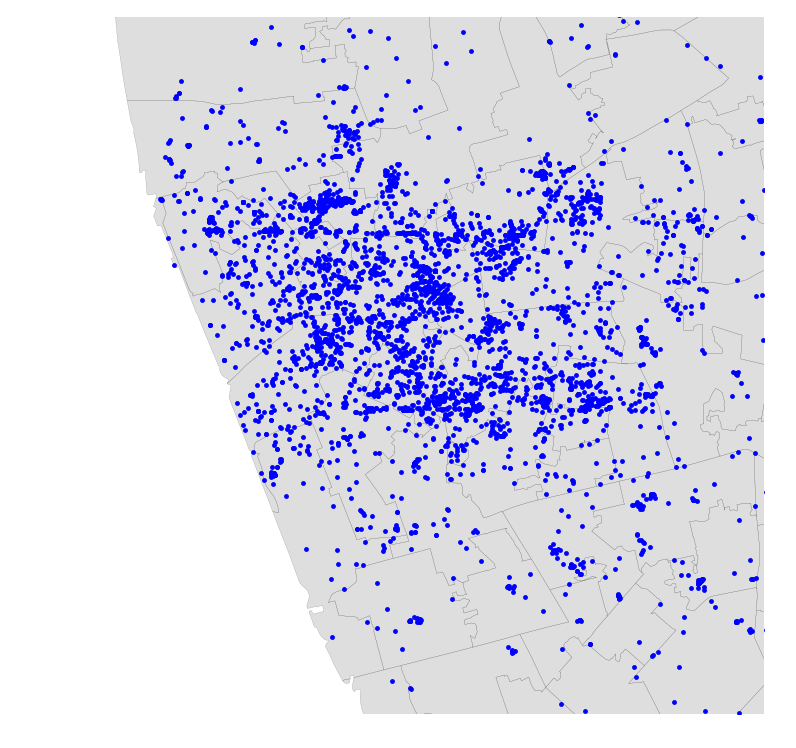

In [7]:
f, ax = plt.subplots(1, figsize=(9, 9))
for poly in lsoas['geometry']:
    gpd.plotting.plot_multipolygon(ax, poly, alpha=0.5, \
                                   edgecolor='0.25', facecolor='0.75', linewidth=0.1)
ax.plot(tw['X'], tw['Y'], marker='.', linewidth=0, color='b')
ax.set_axis_off()
plt.axis('equal')
ax.set_xlim(333000, 337000)
ax.set_ylim(388000, 392000)
#plt.savefig('../lectures/figs/l09_liv_pts.png', dpi=300)
plt.show()

/Users/dani/anaconda/envs/gds/lib/python2.7/site-packages/numpy/lib/function_base.py:3569: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


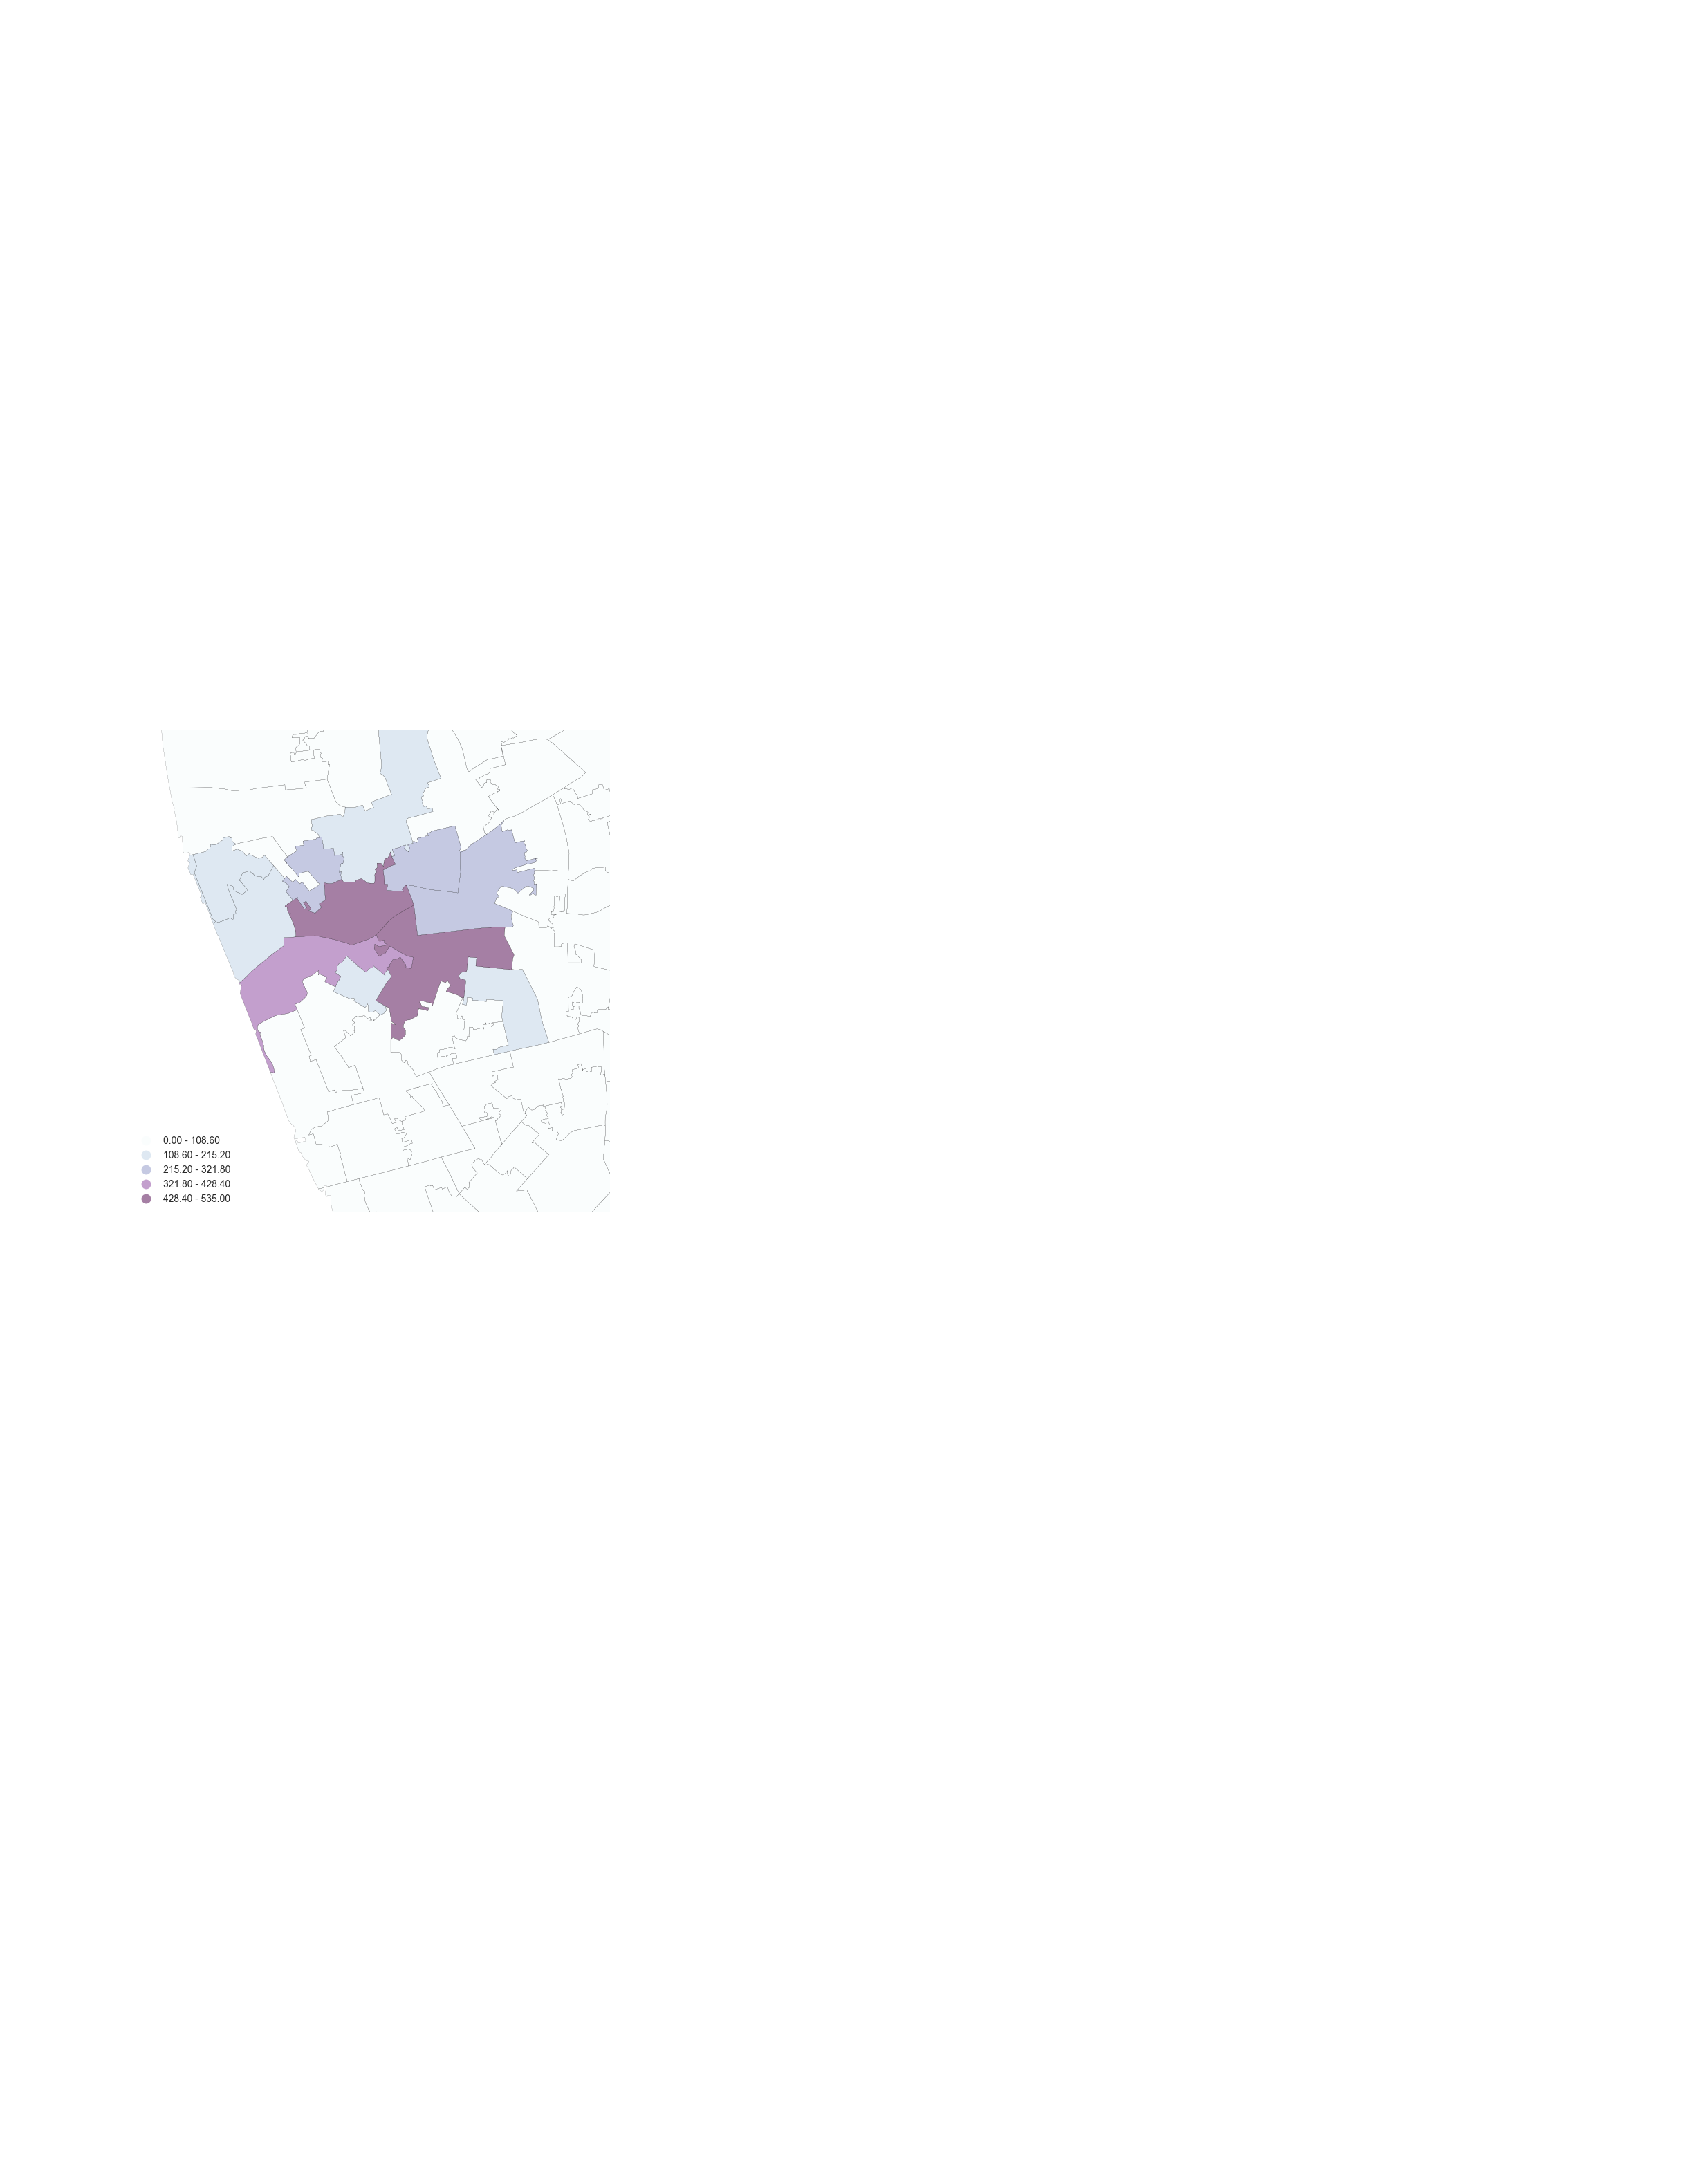

In [8]:
f, ax = plt.subplots(1, figsize=(9, 9))
lsoas.plot(column='tweet_count', scheme='equal_interval', legend=True, \
           ax=ax, cmap='BuPu', linewidth=0.1)
ax.set_axis_off()
plt.axis('equal')
ax.set_xlim(333000, 337000)
ax.set_ylim(388000, 392000)
#plt.savefig('../lectures/figs/l09_liv_cho.png', dpi=300)
plt.show()

#### Regular lattices: hex-binning

Lecture figures:

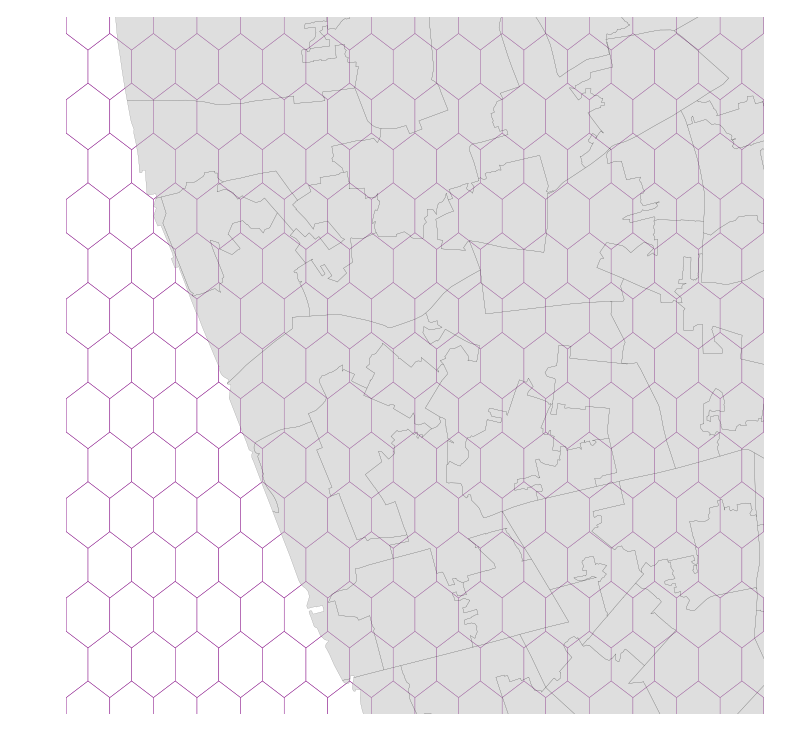

In [9]:
f, ax = plt.subplots(1, figsize=(9, 9))
for poly in lsoas['geometry']:
    gpd.plotting.plot_multipolygon(ax, poly, alpha=0.5, \
                                   edgecolor='0.25', facecolor='0.75', linewidth=0.1)
#hb = ax.hexbin(tw.X, tw.Y, gridsize=50, alpha=0.8, cmap='BuPu')
ax.hexbin(np.array([333000, 345500]), np.array([382000, 398000]), gridsize=50, edgecolors='purple')
ax.set_axis_off()
plt.axis('equal')
ax.set_xlim(333000, 337000)
ax.set_ylim(388000, 392000)
#plt.savefig('../lectures/figs/l09_liv_hex_empty.png', dpi=300)
plt.show()

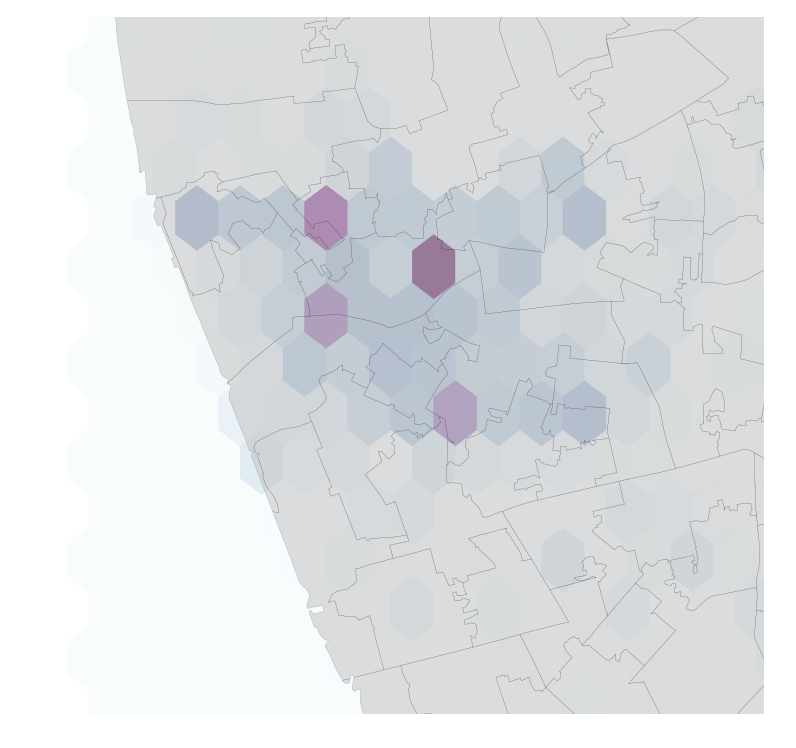

In [10]:
f, ax = plt.subplots(1, figsize=(9, 9))
for poly in lsoas['geometry']:
    gpd.plotting.plot_multipolygon(ax, poly, alpha=0.5, \
                                   edgecolor='0.25', facecolor='0.75', linewidth=0.1)
hb = ax.hexbin(tw.X, tw.Y, gridsize=50, alpha=0.8, cmap='BuPu')
ax.set_axis_off()
plt.axis('equal')
ax.set_xlim(333000, 337000)
ax.set_ylim(388000, 392000)
#jplt.savefig('../lectures/figs/l09_liv_hex_filled.png', dpi=300)
plt.show()

### Kernel Density Estimation

Lecture figures:

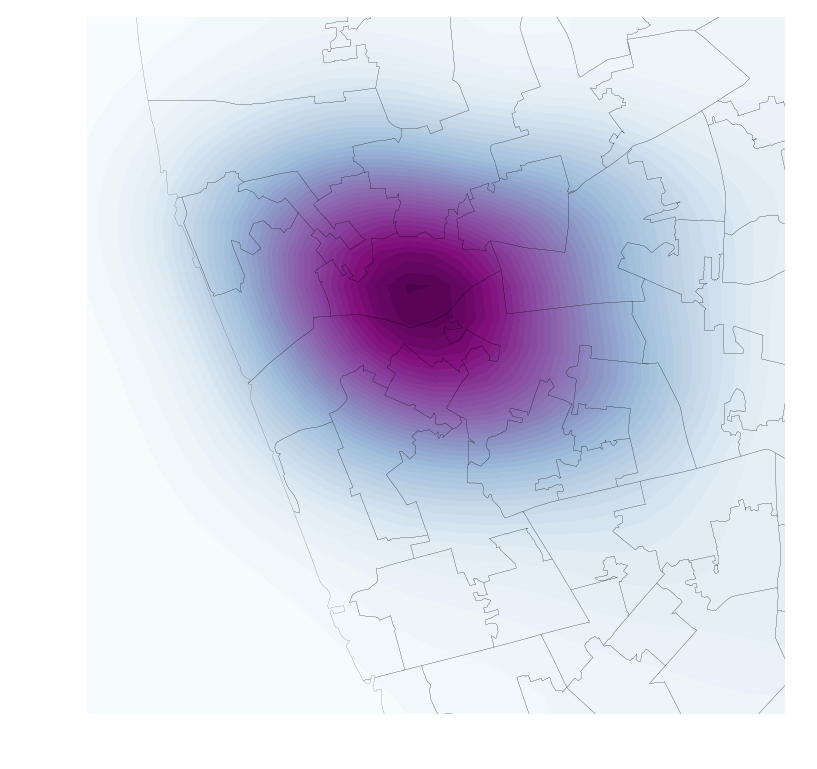

In [11]:
f, ax = plt.subplots(1, figsize=(9, 9))
for poly in lsoas['geometry']:
    gpd.plotting.plot_multipolygon(ax, poly, facecolor='white', alpha=0, linewidth=0.1)
sns.kdeplot(tw['X'], tw['Y'], ax=ax, \
            n_levels=50, shade=True, cmap='BuPu')
ax.set_axis_off()
plt.axis('equal')
ax.set_xlim(333000, 337000)
ax.set_ylim(388000, 392000)
#plt.savefig('../lectures/figs/l09_liv_kde.png', dpi=300)
plt.show()

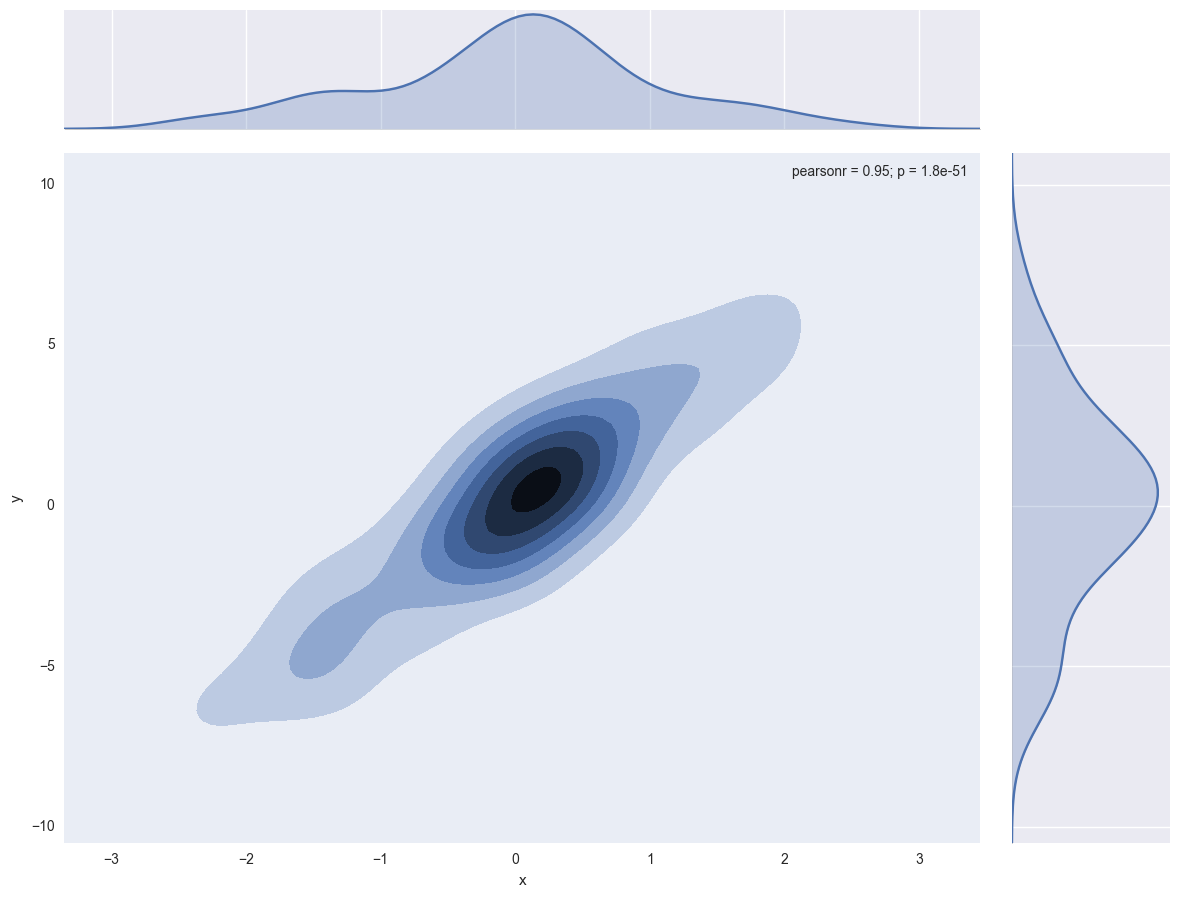

In [12]:
x = np.random.normal(size=100)
y = 3*x + np.random.normal(size=100)
df = pd.DataFrame({'x': x, 'y': y})
sns.jointplot(x="x", y="y", data=df, kind="kde")
fig = plt.gcf()
fig.set_size_inches(12.9, 9.6)
#fig.savefig('../lectures/figs/l09_kde2d.png', dpi=300)

---

<a rel="repo" href="https://github.com/darribas/gds17"><img alt="@darribas/gds17" style="border-width:0" src="../../GitHub-Mark.png" /></a>

This notebook, as well as the entire set of materials, code, and data included
in this course are available as an open Github repository available at: [`https://github.com/darribas/gds17`](https://github.com/darribas/gds17)

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Geographic Data Science'16 - Lab 7, Lecture Figures</span> by <a xmlns:cc="http://creativecommons.org/ns#" href="http://darribas.org" property="cc:attributionName" rel="cc:attributionURL">Dani Arribas-Bel</a> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

